In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scprep
import phate
from scipy.spatial.distance import squareform, pdist

In [20]:
n_train = 3000

data_unif = np.load('saddle_uniform.npy')
data_gaus = np.load('saddle_gaussian.npy')

In [21]:
data = data_unif
name = 'saddle_uniform'

Calculating PHATE...
  Running PHATE on 3000 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.07 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.16 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.07 seconds.
  Calculated landmark operator in 3.87 seconds.
  Calculating optimal t...
    Automatically selected t = 40
  Calculated optimal t in 2.54 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.84 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.43 seconds.
Calculated PHATE in 10.77 seconds.


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


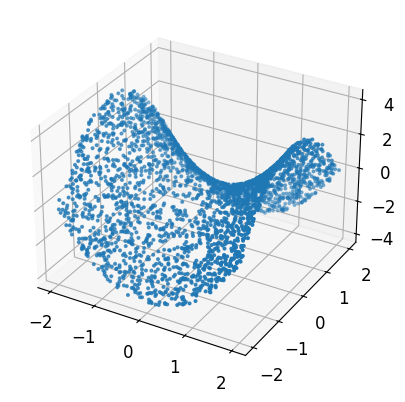

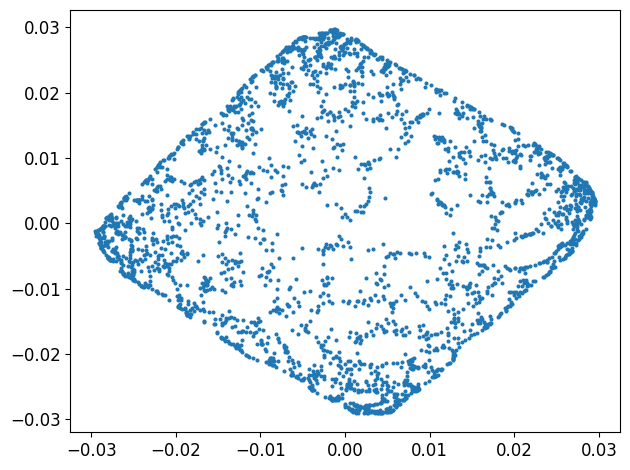

In [26]:
phate_op = phate.PHATE(n_components=2, n_jobs=-1, knn=10, random_state=42)
X_phate = phate_op.fit_transform(data)

scprep.plot.scatter3d(data)
scprep.plot.scatter2d(X_phate)

X_pca = data
dists = squareform(pdist(X_phate))
np.random.seed(32)
if data.shape[0] >= n_train:
    train_ids = np.random.choice(data.shape[0], n_train, replace=False)
    is_train = np.zeros(data.shape[0], dtype=bool)
    is_train[train_ids] = True
else:
    is_train = np.ones(data.shape[0], dtype=bool)
# X_approx = np.dot(X_pca, PCs.T) + means
data_dict = dict(
    data=X_pca,
    phate=X_phate,
    dist=dists,
    is_train=is_train,
)
savepath = '.'
np.savez(f'{savepath}/{name}.npz', **data_dict)

In [27]:
data = data_gaus
name = 'saddle_gaussian'

Calculating PHATE...
  Running PHATE on 3000 observations and 3 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.08 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.11 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.17 seconds.
    Calculating KMeans...
    Calculated KMeans in 3.58 seconds.
  Calculated landmark operator in 4.40 seconds.
  Calculating optimal t...
    Automatically selected t = 36
  Calculated optimal t in 2.54 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.85 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.51 seconds.
Calculated PHATE in 11.42 seconds.


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/geosink/lib/python3.11/site-packages/scprep/plot/utils.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


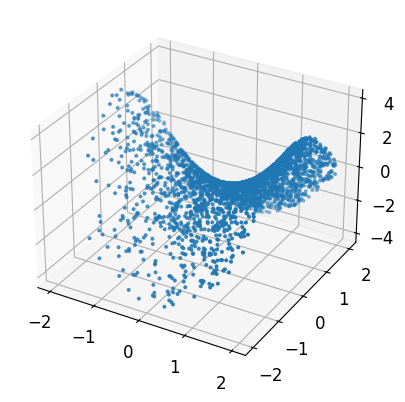

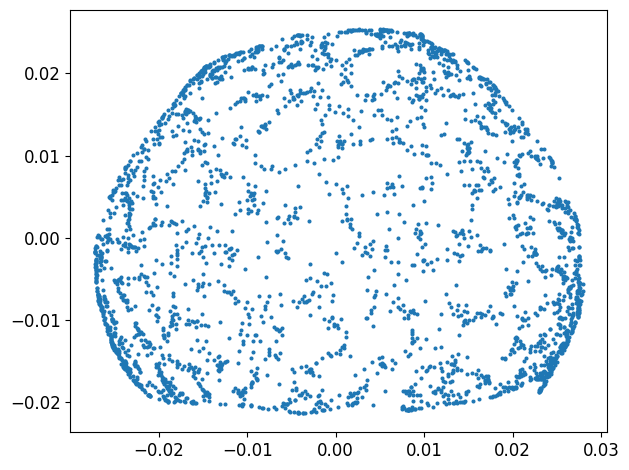

In [28]:
phate_op = phate.PHATE(n_components=2, n_jobs=-1, knn=10, random_state=42)
X_phate = phate_op.fit_transform(data)

scprep.plot.scatter3d(data)
scprep.plot.scatter2d(X_phate)

X_pca = data
dists = squareform(pdist(X_phate))
np.random.seed(32)
if data.shape[0] >= n_train:
    train_ids = np.random.choice(data.shape[0], n_train, replace=False)
    is_train = np.zeros(data.shape[0], dtype=bool)
    is_train[train_ids] = True
else:
    is_train = np.ones(data.shape[0], dtype=bool)
# X_approx = np.dot(X_pca, PCs.T) + means
data_dict = dict(
    data=X_pca,
    phate=X_phate,
    dist=dists,
    is_train=is_train,
)
savepath = '.'
np.savez(f'{savepath}/{name}.npz', **data_dict)